In [33]:
#This is a an implementation of clustering with spectral regularization.

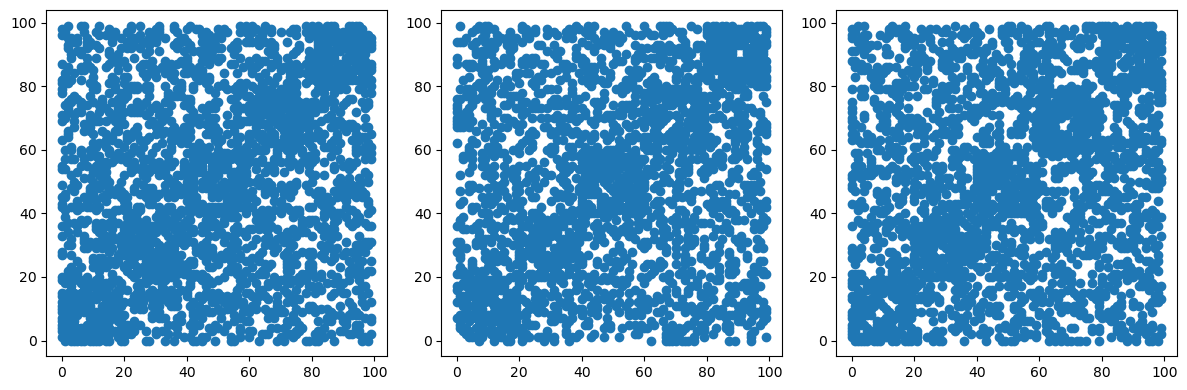

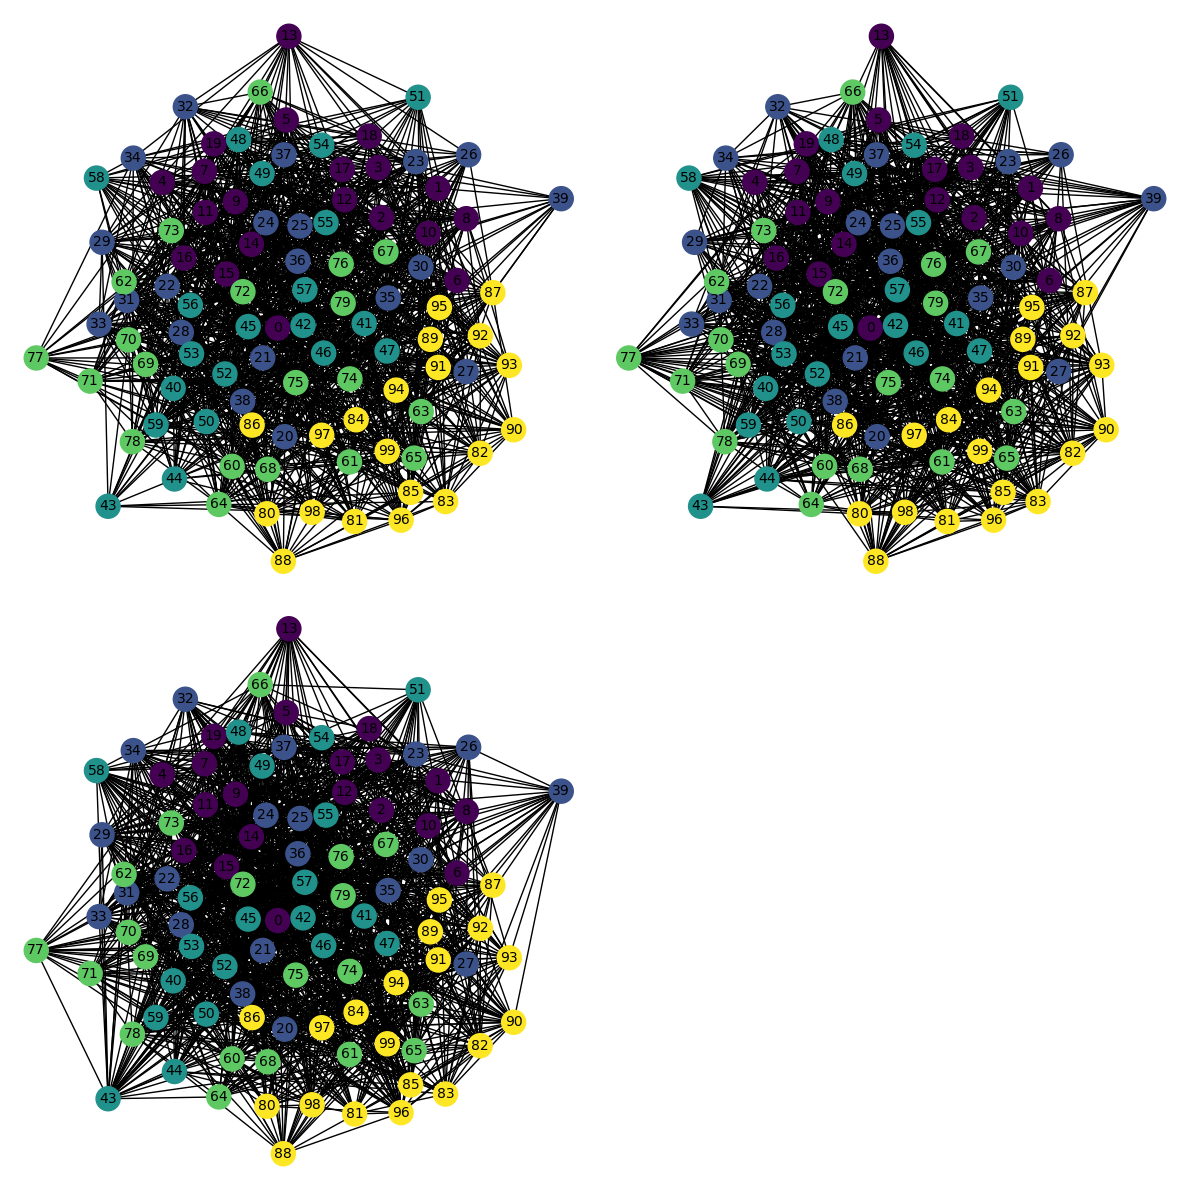

In [34]:
import numpy as np
from sklearn.cluster import KMeans
import warnings
from utils import *
%run GraphCreation.ipynb
warnings.filterwarnings("ignore")

[]

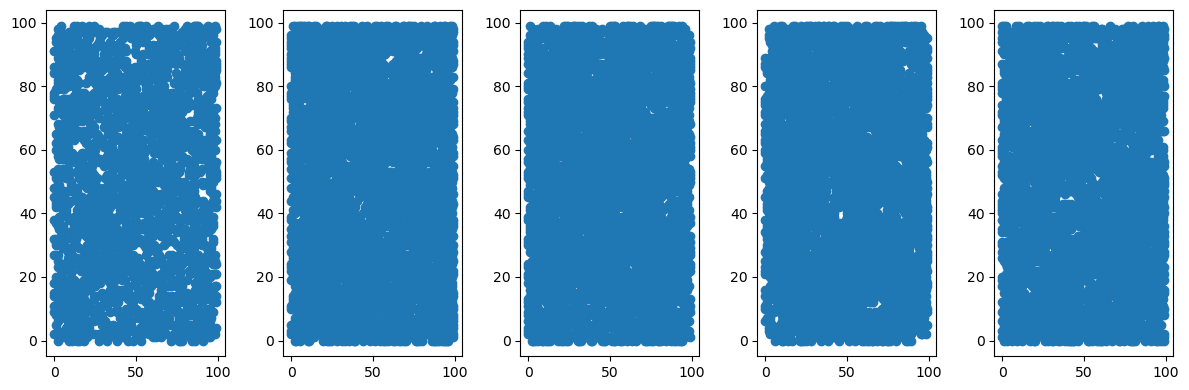

In [56]:
n = 100
M = 5
k = 5

prob = np.full((k,M),0.4)

prob_prime1 = np.full((k,k),0.2)
prob_prime2 = np.full((k,k),0.4)
prob_prime3 = np.full((k,k),0.4)
prob_prime4 = np.full((k,k),0.4)
prob_prime5 = np.full((k,k),0.4)

prob_prime = np.stack((prob_prime1,prob_prime2, prob_prime3, prob_prime4, prob_prime5),axis=2)
clusters_size = k*[20]

matrix,index_cluster = graph_creation_1(n,M,k,clusters_size,prob,prob_prime)

fig, axs = plt.subplots(1, M, figsize=(12, 4))  # 1 row, 3 columns, total figure size is (15, 5) inches

for i in range(M):
  x,y = np.where(matrix[:,:,i] == 1)
  axs[i].scatter(x,y)

plt.tight_layout()
plt.plot()

[]

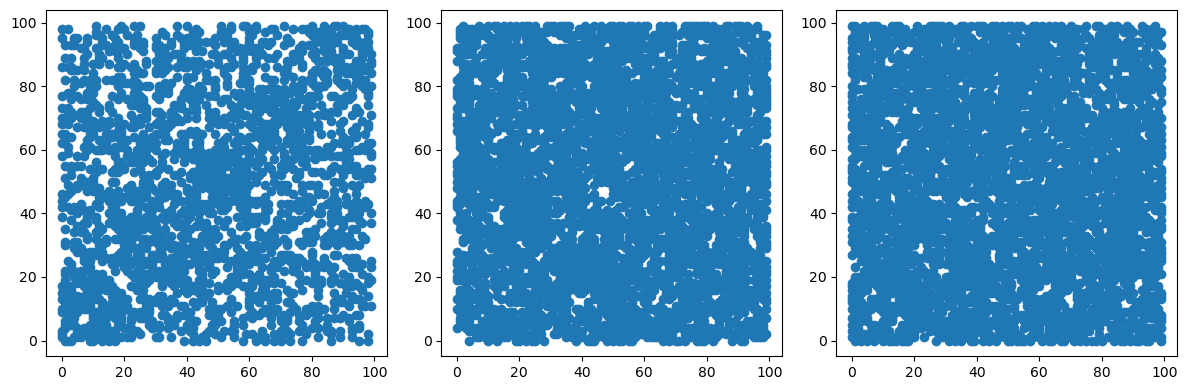

In [54]:
n = 100
M = 3
k = 5

prob = np.full((k,M),0.4)

prob_prime1 = np.full((k,k),0.2)
prob_prime2 = np.full((k,k),0.4)
prob_prime3 = np.full((k,k),0.4)

prob_prime = np.stack((prob_prime1,prob_prime2, prob_prime3),axis=2)
clusters_size = k*[20]

matrix,index_cluster = graph_creation_1(n,M,k,clusters_size,prob,prob_prime)

fig, axs = plt.subplots(1, M, figsize=(12, 4))  # 1 row, 3 columns, total figure size is (15, 5) inches

for i in range(M):
  x,y = np.where(matrix[:,:,i] == 1)
  axs[i].scatter(x,y)

plt.tight_layout()
plt.plot()

In [36]:
def compute_degree_matrix(M):
  res = np.array([0]*len(M))
  for i in range(len(M)):
    for j in range(len(M)):
      if(M[i][j] != 0):
        res[i]+=1
  return np.diag(res)

In [37]:
def k_means_cluster(U,k):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(U)
  return kmeans.labels_

In [38]:
def spectral_clustering(W,k):
  n,_,M = W.shape
  lam = 1
  mu = 1/lam
  D = compute_degree_matrix(W[:, :, 0])
  L = np.linalg.inv(D)@(D-W[:, :, 0])
  eigenvalues,eigenvectors = np.linalg.eig(L)
  indexes = np.argsort(eigenvalues)[0:k]
  U = eigenvectors[:,indexes]

  for i in range(M):
    U_prime = np.zeros(U.shape)
    D_i = compute_degree_matrix(W[:, :, i])
    L_sym = np.linalg.inv(np.sqrt(D_i))@(D_i-W[:,:,1])@np.linalg.inv(np.sqrt(D_i))
    for i in range(1,k):
      f = mu*np.linalg.inv((L_sym + mu*np.identity(n)))@U[:,i]
      U_prime[:,i] = f
    U = U_prime.copy()

  return k_means_cluster(U_prime,k)


In [57]:
print(spectral_clustering(matrix,5))

[3 1 2 0 4 3 3 3 4 4 3 1 3 1 3 4 3 4 4 4 1 1 1 0 0 0 1 1 0 3 1 1 1 1 0 4 4
 1 4 0 2 3 1 4 1 0 3 1 1 0 2 3 0 1 2 0 2 4 3 0 2 2 0 4 3 1 3 0 2 2 2 2 3 2
 0 0 1 2 0 1 1 4 3 0 4 4 4 0 3 4 0 0 2 4 2 1 2 2 0 0]
